# DATA WRANGLING

In [33]:
import pandas as pd
import seaborn as sns
import os
from math import log
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from termcolor import colored as cl # text customization
import seaborn as sb # visualization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.rcParams['figure.figsize'] = (20, 10) # plot size

sns.set(style='ticks')
sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [2]:
bitcoin_data = pd.read_csv('gemini_BTCUSD_2020_1min.csv')
bitcoin_data.Date = pd.to_datetime(bitcoin_data.Date)
bitcoin_data.Date = bitcoin_data.Date.dt.date
bitcoin_data = bitcoin_data.set_index(pd.DatetimeIndex(bitcoin_data.Date)).sort_index()


In [3]:
bitcoin_data.shape

(658065, 8)

In [4]:
bitcoin_data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,,
2020-01-01,1.577840e+12,2020-01-01,BTCUSD,7165.90,7170.79,7163.30,7163.30,0.007931
2020-01-01,1.577890e+12,2020-01-01,BTCUSD,7211.42,7213.21,7209.92,7210.01,0.141040
2020-01-01,1.577890e+12,2020-01-01,BTCUSD,7215.06,7217.90,7211.42,7211.42,0.000030
2020-01-01,1.577890e+12,2020-01-01,BTCUSD,7215.06,7215.06,7215.06,7215.06,0.000000
2020-01-01,1.577890e+12,2020-01-01,BTCUSD,7215.06,7215.06,7215.06,7215.06,0.000000


In [5]:
bitcoin_data.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,,
2021-04-19,1.618820e+12,2021-04-19,BTCUSD,57508.38,57559.44,57508.38,57519.61,0.346725
2021-04-19,1.618820e+12,2021-04-19,BTCUSD,57624.66,57624.66,57483.78,57483.79,1.235630
2021-04-20,1.618880e+12,2021-04-20,BTCUSD,55691.79,55793.15,55691.79,55768.94,3.309904
2021-04-20,1.618880e+12,2021-04-20,BTCUSD,55768.94,55849.82,55711.74,55717.47,0.573458
2021-04-20,1.618880e+12,2021-04-20,BTCUSD,55717.47,55723.00,55541.69,55541.69,2.406734


In [6]:
bitcoin_data[['Open', 'High', 'Low', 'Close', 'Volume']]

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-01,7165.90,7170.79,7163.30,7163.30,0.007931
2020-01-01,7211.42,7213.21,7209.92,7210.01,0.141040
2020-01-01,7215.06,7217.90,7211.42,7211.42,0.000030
2020-01-01,7215.06,7215.06,7215.06,7215.06,0.000000
2020-01-01,7215.06,7215.06,7215.06,7215.06,0.000000
...,...,...,...,...,...
2021-04-19,57508.38,57559.44,57508.38,57519.61,0.346725
2021-04-19,57624.66,57624.66,57483.78,57483.79,1.235630
2021-04-20,55691.79,55793.15,55691.79,55768.94,3.309904


In [7]:
bitcoin_data.sort_index().iloc[26:30]

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,,
2020-01-01,1.577900e+12,2020-01-01,BTCUSD,7196.30,7196.30,7196.30,7196.30,0.000000
2020-01-01,1.577900e+12,2020-01-01,BTCUSD,7194.06,7200.75,7194.06,7196.30,3.672227
2020-01-01,1.577900e+12,2020-01-01,BTCUSD,7196.75,7196.75,7194.06,7194.06,0.000010
2020-01-01,1.577900e+12,2020-01-01,BTCUSD,7200.53,7200.99,7196.75,7196.75,0.588126


In [8]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 658065 entries, 2020-01-01 to 2021-04-20
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658065 non-null  float64
 1   Date            658065 non-null  object 
 2   Symbol          658065 non-null  object 
 3   Open            658065 non-null  float64
 4   High            658065 non-null  float64
 5   Low             658065 non-null  float64
 6   Close           658065 non-null  float64
 7   Volume          658065 non-null  float64
dtypes: float64(6), object(2)
memory usage: 45.2+ MB


In [9]:
bitcoin_data.columns

Index(['Unix Timestamp', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close',
       'Volume'],
      dtype='object')

In [10]:
duplicates = bitcoin_data.duplicated()
print(duplicates)

Date
2020-01-01    False
2020-01-01    False
2020-01-01    False
2020-01-01    False
2020-01-01     True
              ...  
2021-04-19    False
2021-04-19    False
2021-04-20    False
2021-04-20    False
2021-04-20    False
Length: 658065, dtype: bool


# EXPLORATORY DATA ANALYSIS

In [11]:
bitcoin_data.isnull().sum().sum()

0

In [12]:
bitcoin_data.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,6.580650e+05,658065.000000,658065.000000,658065.000000,658065.000000,658065.000000
mean,1.598615e+12,19816.056864,19828.754551,19803.078994,19816.127876,1.552492
std,1.188579e+10,16737.625576,16750.786597,16723.509939,16737.677688,6.235548
min,1.577840e+12,3935.290000,3939.260000,3901.250000,3935.290000,0.000000
25%,1.588310e+12,9177.940000,9180.000000,9176.310000,9177.940000,0.022162
50%,1.598790e+12,10936.110000,10939.210000,10932.980000,10936.150000,0.189712
75%,1.609000e+12,25741.490000,25755.150000,25724.100000,25743.160000,1.023481
max,1.618880e+12,64890.000000,64900.000000,64775.620000,64890.000000,1043.579964


In [13]:
bitcoin_data['Close'].unique() 

array([ 7163.3 ,  7210.01,  7211.42, ..., 57483.79, 55717.47, 55541.69])

In [14]:
corr_matrix = bitcoin_data.corr()
corr_matrix[['Open', 'Close']]

,Open,Close
Unix Timestamp,0.827159,0.827160
Open,1.000000,0.999998
High,0.999999,0.999999
Low,0.999998,0.999999
Close,0.999998,1.000000
Volume,-0.000244,-0.000327


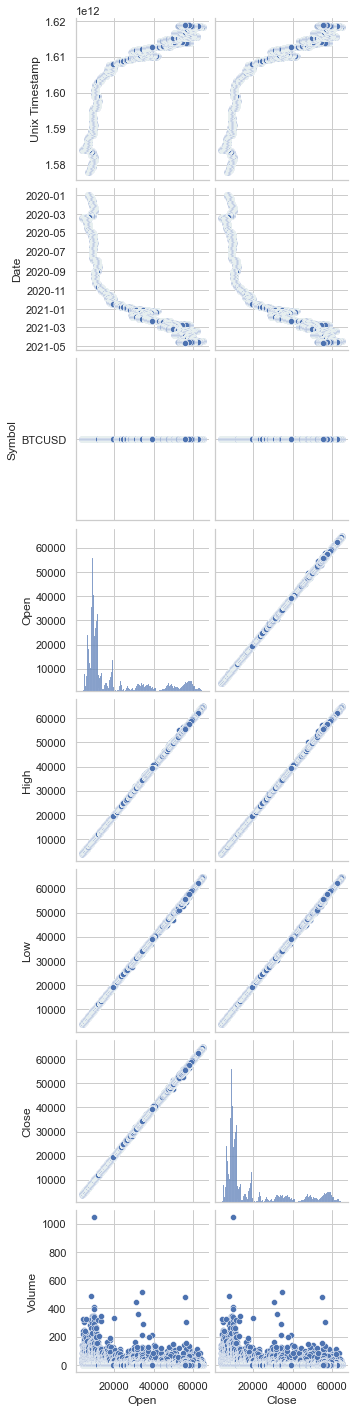

In [15]:
sns.pairplot(bitcoin_data, x_vars = ['Open','Close'], y_vars = [bitcoin_data.columns[i] for i in range(8)])
plt.show()

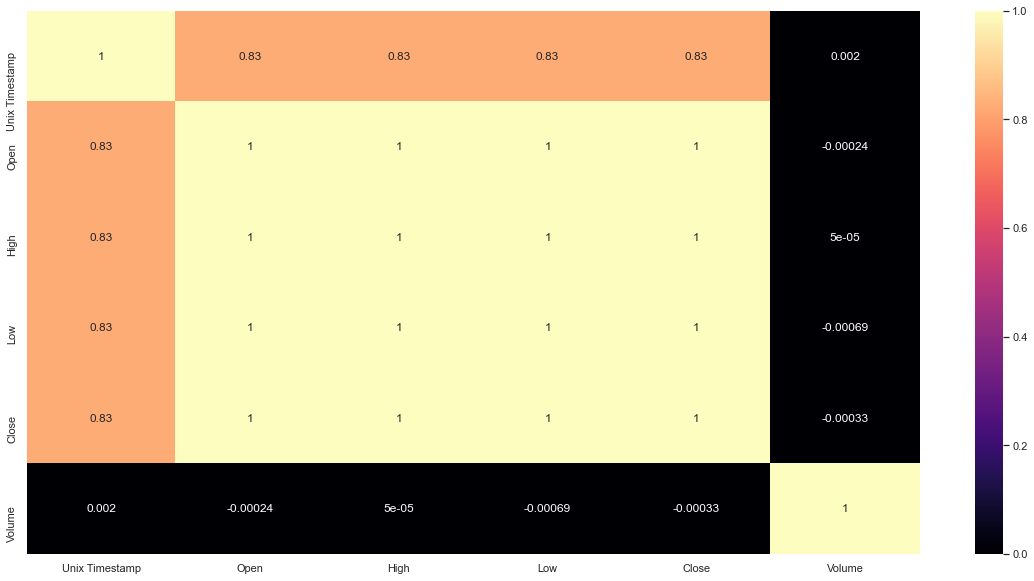

In [16]:
sb.heatmap(bitcoin_data.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

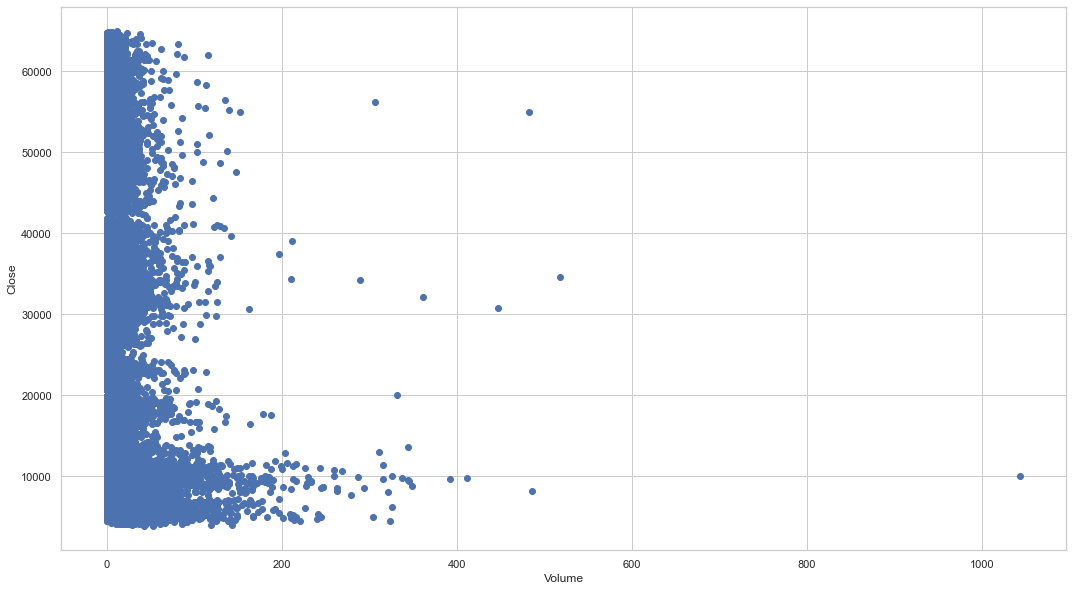

In [17]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(bitcoin_data['Volume'], bitcoin_data['Close'])
ax.set_xlabel('Volume')
ax.set_ylabel('Close')
plt.show()

In [18]:
print(cl(bitcoin_data.dtypes, attrs = ['bold']))

Unix Timestamp    float64
Date               object
Symbol             object
Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
dtype: object


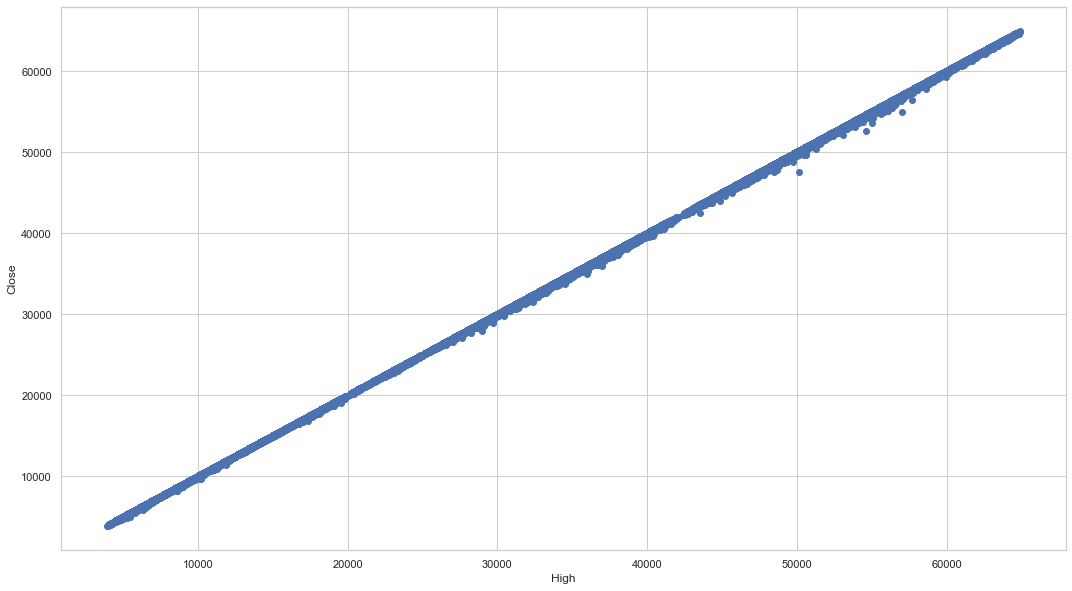

In [19]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(bitcoin_data['High'], bitcoin_data['Close'])
ax.set_xlabel('High')
ax.set_ylabel('Close')
plt.show()

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


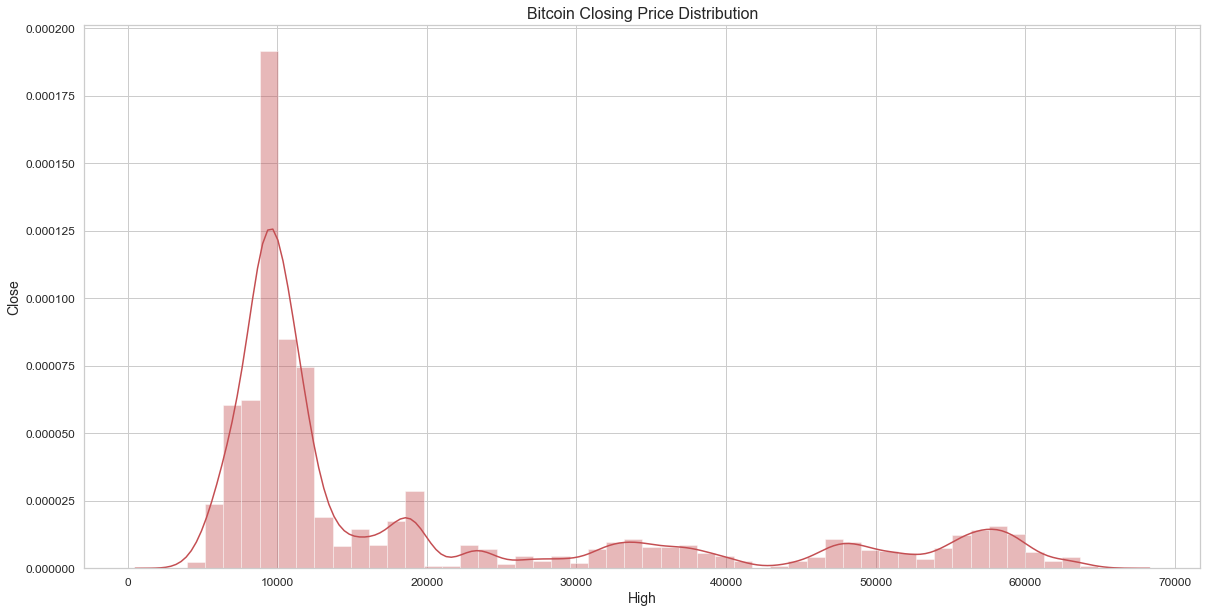

In [20]:
sb.distplot(bitcoin_data['Close'], color = 'r')
plt.title('Bitcoin Closing Price Distribution', fontsize = 16)
plt.xlabel('High', fontsize = 14)
plt.ylabel('Close', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [22]:
#open_sale = bitcoin_data.groupby('Date')['Open'].sum()
#open_sale = pd.DataFrame(open_sale)
#open_sale.head()

*Checking for outliers*

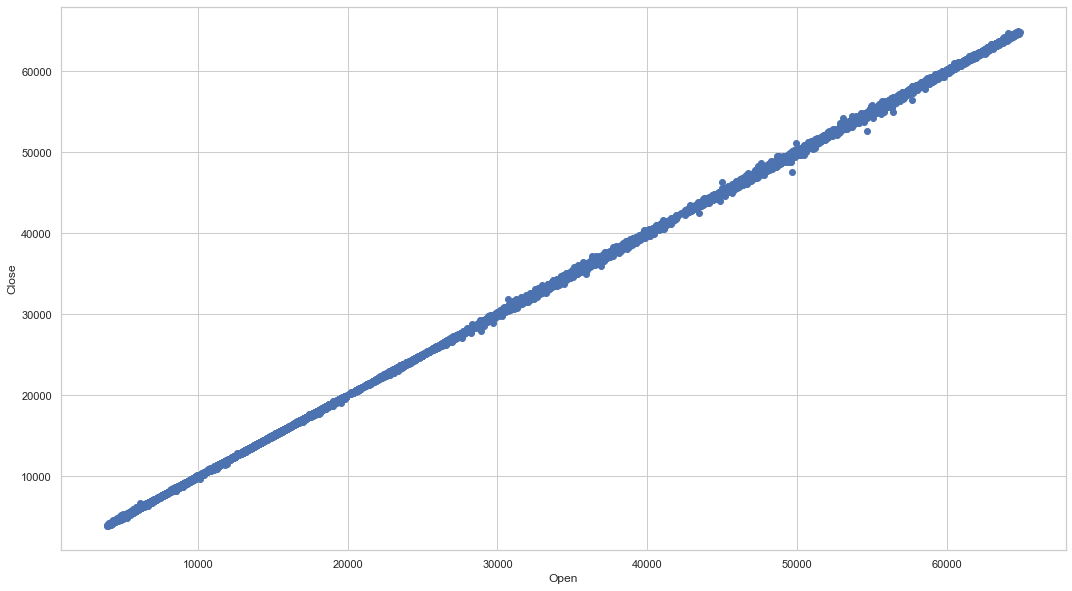

In [23]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(bitcoin_data['Open'], bitcoin_data['Close'])
ax.set_xlabel('Open')
ax.set_ylabel('Close')
plt.show()

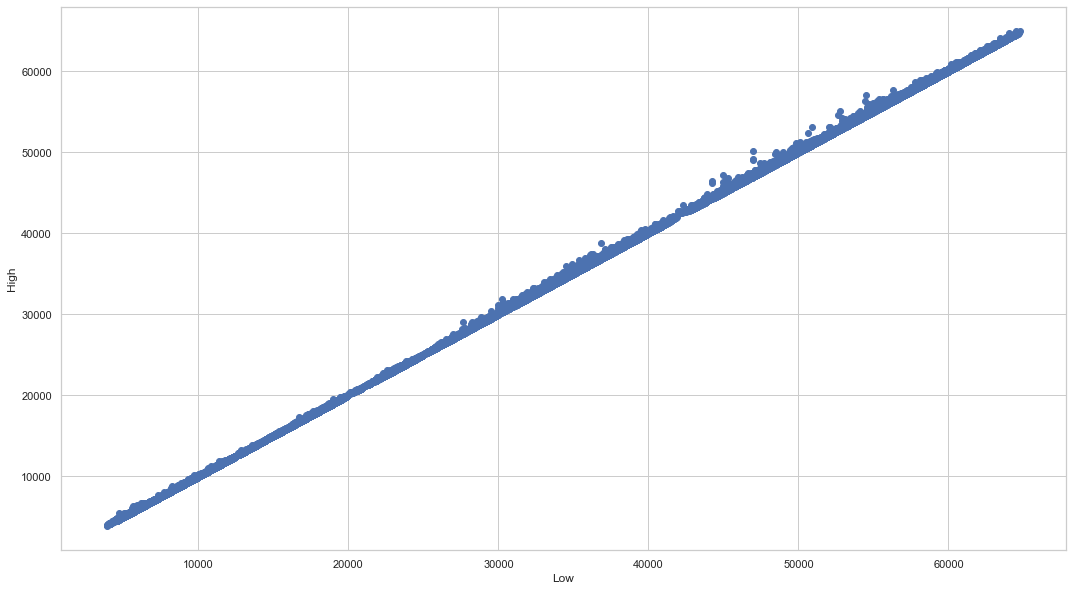

In [24]:
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(bitcoin_data['Low'], bitcoin_data['High'])
ax.set_xlabel('Low')
ax.set_ylabel('High')
plt.show()

From the above charts, it could be seen that there are no outliers.

In [25]:
!pip install pandas-profiling==2.8.0
import pandas_profiling as pp
bitcoin_data.profile_report()

ValueError: cannot insert Date, already exists

### (1) What is the price volatility from January 2020 to April 2021?

In [ ]:
#bitcoin_data.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

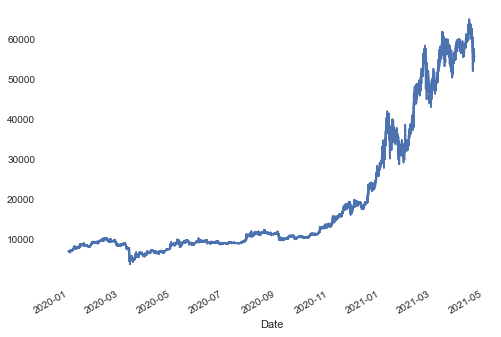

In [26]:
bitcoin_data['Close'].plot()

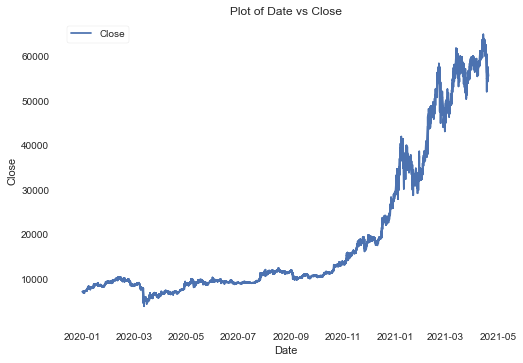

In [27]:
# Plot the simple moving average for 20 day
plt.title('Plot of Date vs Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(bitcoin_data['Close'], label='Close')
plt.legend()
plt.show()

### (2) What is the daily trend high price?

In [28]:
bitcoin_data['High']

Date
2020-01-01     7170.79
2020-01-01     7213.21
2020-01-01     7217.90
2020-01-01     7215.06
2020-01-01     7215.06
                ...   
2021-04-19    57559.44
2021-04-19    57624.66
2021-04-20    55793.15
2021-04-20    55849.82
2021-04-20    55723.00
Name: High, Length: 658065, dtype: float64

In [29]:
bitcoin_data['Low']

Date
2020-01-01     7163.30
2020-01-01     7209.92
2020-01-01     7211.42
2020-01-01     7215.06
2020-01-01     7215.06
                ...   
2021-04-19    57508.38
2021-04-19    57483.78
2021-04-20    55691.79
2021-04-20    55711.74
2021-04-20    55541.69
Name: Low, Length: 658065, dtype: float64

In [30]:
bitcoin_data['high_daily_%_change'] = bitcoin_data['High'].pct_change()
bitcoin_data['high_daily_%_change']

Date
2020-01-01         NaN
2020-01-01    0.005916
2020-01-01    0.000650
2020-01-01   -0.000393
2020-01-01    0.000000
                ...   
2021-04-19    0.000692
2021-04-19    0.001133
2021-04-20   -0.031783
2021-04-20    0.001016
2021-04-20   -0.002271
Name: high_daily_%_change, Length: 658065, dtype: float64

<AxesSubplot:xlabel='Date'>

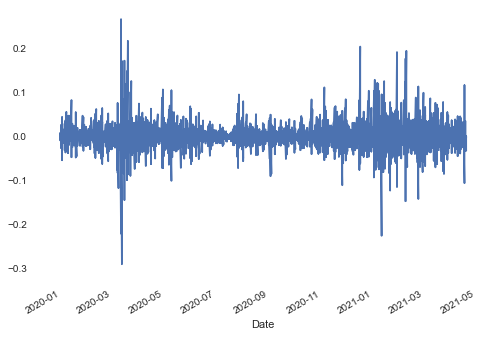

In [31]:
bitcoin_data['high_daily_%_change'].plot()

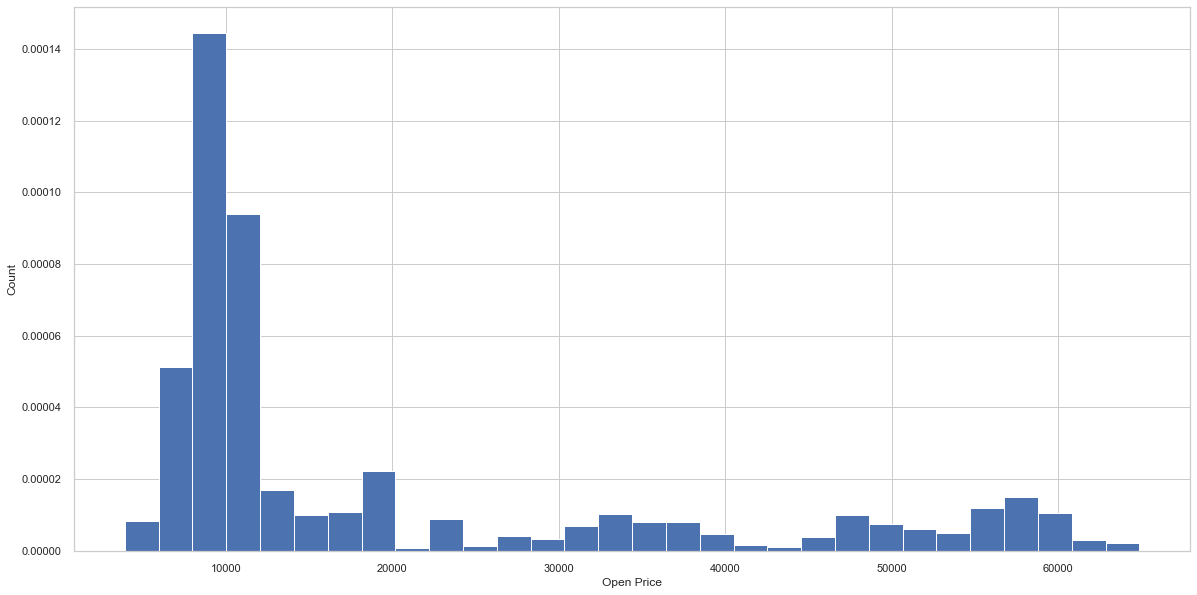

In [36]:

np.random.seed(42)

plt.hist(bitcoin_data['Open'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Open Price');


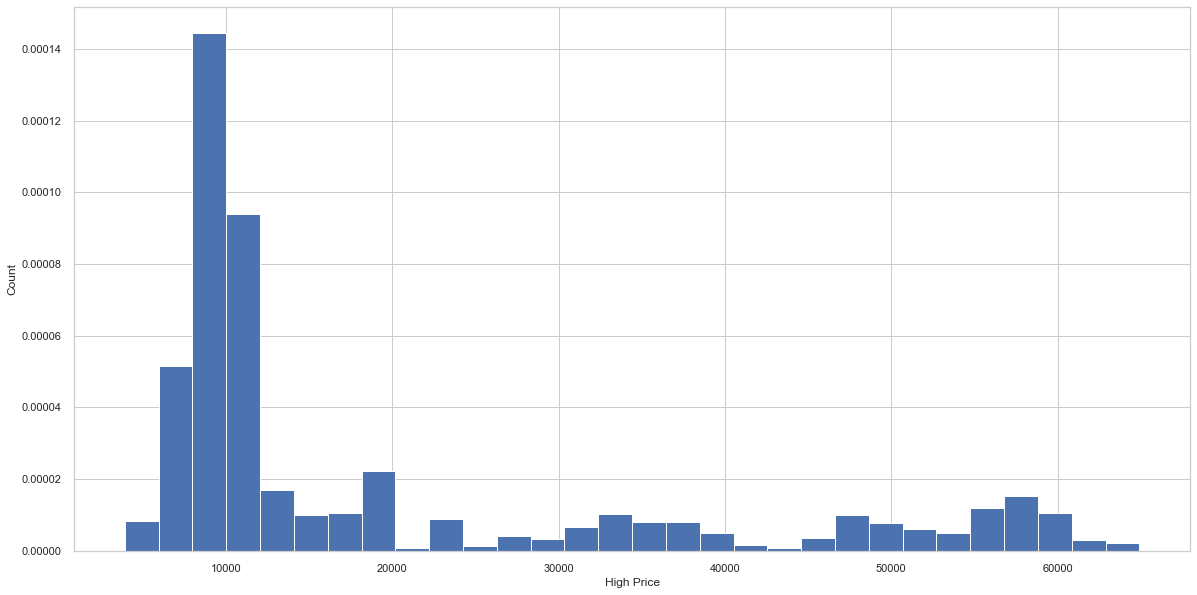

In [37]:
np.random.seed(42)

plt.hist(bitcoin_data['High'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('High Price');

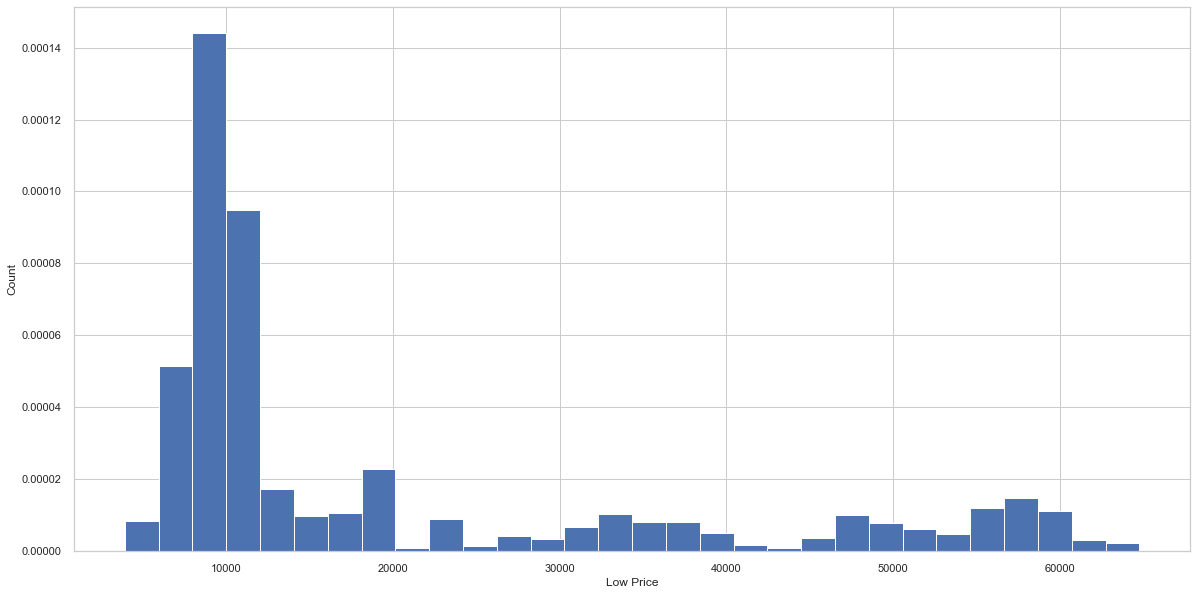

In [38]:
np.random.seed(42)

plt.hist(bitcoin_data['Low'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Low Price');

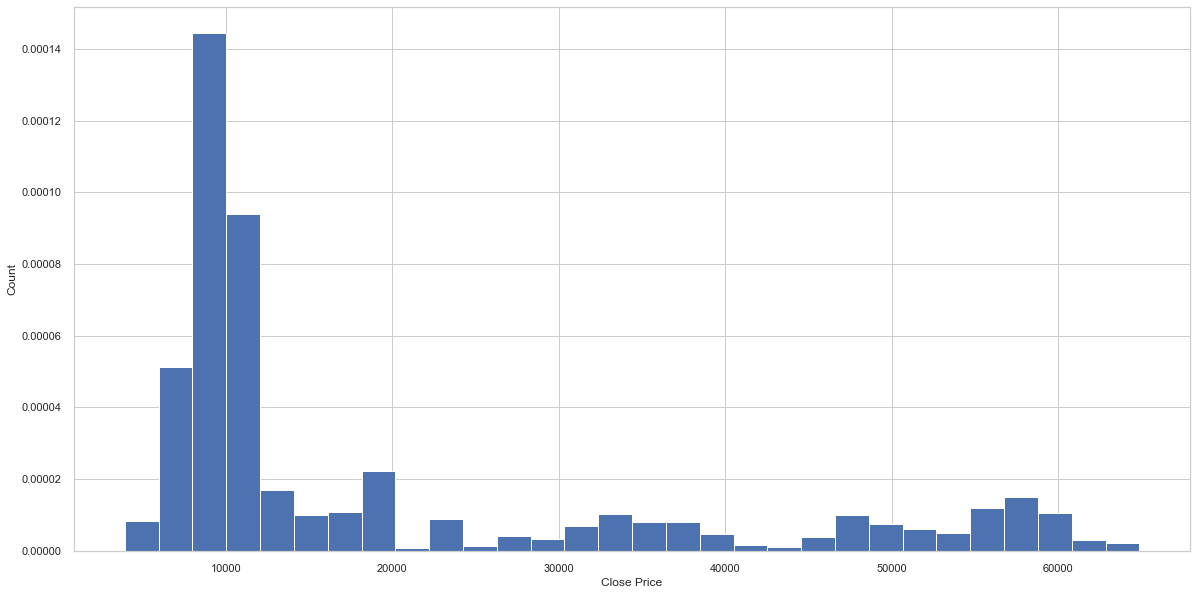

In [39]:
np.random.seed(42)

plt.hist(bitcoin_data['Close'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Close Price');